In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r"C:\Users\Monterola\Desktop\Folder that syncs to Gdrive\Folder that syncs to Gdrive\Python Portfolio Projects\movies.csv").sort_index(axis=1)

In [2]:
df = df.dropna()

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

# Let's take a look at the data
df.head()

budget             company         country         director      genre  \
0  19000000.0        Warner Bros.  United Kingdom  Stanley Kubrick      Drama   
1   4500000.0   Columbia Pictures   United States   Randal Kleiser  Adventure   
2  18000000.0           Lucasfilm   United States   Irvin Kershner     Action   
3   3500000.0  Paramount Pictures   United States     Jim Abrahams     Comedy   
4   6000000.0      Orion Pictures   United States     Harold Ramis     Comedy   

         gross                                            name rating  \
0   46998772.0                                     The Shining      R   
1   58853106.0                                 The Blue Lagoon      R   
2  538375067.0  Star Wars: Episode V - The Empire Strikes Back     PG   
3   83453539.0                                       Airplane!     PG   
4   39846344.0                                      Caddyshack      R   

                        released  runtime  score            star      votes  \
0  June 13, 1980 (United States)    146.0    8.4  Jack Nicholson   927000.0   
1   July 2, 1980 (United States)    104.0    5.8  Brooke Shields    65000.0   
2  June 20, 1980 (United States)    124.0    8.7     Mark Hamill  1200000.0   
3   July 2, 1980 (United States)     88.0    7.7     Robert Hays   221000.0   
4  July 25, 1980 (United States)     98.0    7.3     Chevy Chase   108000.0   

                    writer  year  yearcorrect  
0             Stephen King  1980         1980  
1  Henry De Vere Stacpoole  1980         1980  
2           Leigh Brackett  1980         1980  
3             Jim Abrahams  1980         1980  
4       Brian Doyle-Murray  1980         1980

In [3]:
# See if there is any data missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%
yearcorrect - 0.0%


In [4]:
df.dtypes

budget         float64
company         object
country         object
director        object
genre           object
gross          float64
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes          float64
writer          object
year             int64
yearcorrect      int32
dtype: object

In [5]:
# change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df

budget                              company         country  \
0      19000000                         Warner Bros.  United Kingdom   
1       4500000                    Columbia Pictures   United States   
2      18000000                            Lucasfilm   United States   
3       3500000                   Paramount Pictures   United States   
4       6000000                       Orion Pictures   United States   
...         ...                                  ...             ...   
7648   90000000                    Columbia Pictures   United States   
7649   85000000                   Paramount Pictures   United States   
7650  175000000                   Universal Pictures   United States   
7651  135000000                 20th Century Studios          Canada   
7652   80000000  Beijing Diqi Yinxiang Entertainment           China   

             director      genre      gross  \
0     Stanley Kubrick      Drama   46998772   
1      Randal Kleiser  Adventure   58853106   
2      Irvin Kershner     Action  538375067   
3        Jim Abrahams     Comedy   83453539   
4        Harold Ramis     Comedy   39846344   
...               ...        ...        ...   
7648     Adil El Arbi     Action  426505244   
7649      Jeff Fowler     Action  319715683   
7650   Stephen Gaghan  Adventure  245487753   
7651    Chris Sanders  Adventure  111105497   
7652          Hu Guan     Action  461421559   

                                                name     rating  \
0                                        The Shining          R   
1                                    The Blue Lagoon          R   
2     Star Wars: Episode V - The Empire Strikes Back         PG   
3                                          Airplane!         PG   
4                                         Caddyshack          R   
...                                              ...        ...   
7648                               Bad Boys for Life          R   
7649                              Sonic the Hedgehog         PG   
7650                                        Dolittle         PG   
7651                            The Call of the Wild         PG   
7652                               The Eight Hundred  Not Rated   

                               released  runtime  score               star  \
0         June 13, 1980 (United States)    146.0    8.4     Jack Nicholson   
1          July 2, 1980 (United States)    104.0    5.8     Brooke Shields   
2         June 20, 1980 (United States)    124.0    8.7        Mark Hamill   
3          July 2, 1980 (United States)     88.0    7.7        Robert Hays   
4         July 25, 1980 (United States)     98.0    7.3        Chevy Chase   
...                                 ...      ...    ...                ...   
7648   January 17, 2020 (United States)    124.0    6.6         Will Smith   
7649  February 14, 2020 (United States)     99.0    6.5       Ben Schwartz   
7650   January 17, 2020 (United States)    101.0    5.6  Robert Downey Jr.   
7651  February 21, 2020 (United States)    100.0    6.8      Harrison Ford   
7652    August 28, 2020 (United States)    149.0    6.8    Zhi-zhong Huang   

          votes                   writer  year  yearcorrect  
0      927000.0             Stephen King  1980         1980  
1       65000.0  Henry De Vere Stacpoole  1980         1980  
2     1200000.0           Leigh Brackett  1980         1980  
3      221000.0             Jim Abrahams  1980         1980  
4      108000.0       Brian Doyle-Murray  1980         1980  
...         ...                      ...   ...          ...  
7648   140000.0              Peter Craig  2020         2020  
7649   102000.0                Pat Casey  2020         2020  
7650    53000.0           Stephen Gaghan  2020         2020  
7651    42000.0            Michael Green  2020         2020  
7652     3700.0                  Hu Guan  2020         2020  

[5421 rows x 16 columns]

In [6]:
#create correct year column
#df['yearcorrect'] = df['released'].astype(str).str[:4]
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
df.head()

budget             company         country         director      genre  \
0  19000000        Warner Bros.  United Kingdom  Stanley Kubrick      Drama   
1   4500000   Columbia Pictures   United States   Randal Kleiser  Adventure   
2  18000000           Lucasfilm   United States   Irvin Kershner     Action   
3   3500000  Paramount Pictures   United States     Jim Abrahams     Comedy   
4   6000000      Orion Pictures   United States     Harold Ramis     Comedy   

       gross                                            name rating  \
0   46998772                                     The Shining      R   
1   58853106                                 The Blue Lagoon      R   
2  538375067  Star Wars: Episode V - The Empire Strikes Back     PG   
3   83453539                                       Airplane!     PG   
4   39846344                                      Caddyshack      R   

                        released  runtime  score            star      votes  \
0  June 13, 1980 (United States)    146.0    8.4  Jack Nicholson   927000.0   
1   July 2, 1980 (United States)    104.0    5.8  Brooke Shields    65000.0   
2  June 20, 1980 (United States)    124.0    8.7     Mark Hamill  1200000.0   
3   July 2, 1980 (United States)     88.0    7.7     Robert Hays   221000.0   
4  July 25, 1980 (United States)     98.0    7.3     Chevy Chase   108000.0   

                    writer  year yearcorrect  
0             Stephen King  1980        1980  
1  Henry De Vere Stacpoole  1980        1980  
2           Leigh Brackett  1980        1980  
3             Jim Abrahams  1980        1980  
4       Brian Doyle-Murray  1980        1980

In [7]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

budget                    company        country  \
5445  237000000      Twentieth Century Fox  United States   
7445  356000000             Marvel Studios  United States   
3045  200000000      Twentieth Century Fox  United States   
6663  245000000                  Lucasfilm  United States   
7244  321000000             Marvel Studios  United States   
...         ...                        ...            ...   
5640    3000000           Two Prong Lesson  United States   
2434    5000000           Trimark Pictures  United States   
3681    5000000  Copperheart Entertainment         Canada   
272      800000           Embassy Pictures  United States   
3203   15000000                   Daybreak  United States   

                 director   genre       gross  \
5445        James Cameron  Action  2847246203   
7445        Anthony Russo  Action  2797501328   
3045        James Cameron   Drama  2201647264   
6663          J.J. Abrams  Action  2069521700   
7244        Anthony Russo  Action  2048359754   
...                   ...     ...         ...   
5640  Francesca Gregorini   Drama        5073   
2434     Stephen Cornwell  Action        2970   
3681         John Fawcett   Drama        2554   
272          Charles Band  Horror        2270   
3203         George Huang  Comedy         309   

                                            name     rating  \
5445                                      Avatar      PG-13   
7445                           Avengers: Endgame      PG-13   
3045                                     Titanic      PG-13   
6663  Star Wars: Episode VII - The Force Awakens      PG-13   
7244                      Avengers: Infinity War      PG-13   
...                                          ...        ...   
5640                                 Tanner Hall          R   
2434                  Philadelphia Experiment II      PG-13   
3681                                Ginger Snaps  Not Rated   
272                                     Parasite          R   
3203                                  Trojan War      PG-13   

                               released  runtime  score               star  \
5445  December 18, 2009 (United States)    162.0    7.8    Sam Worthington   
7445     April 26, 2019 (United States)    181.0    8.4  Robert Downey Jr.   
3045  December 19, 1997 (United States)    194.0    7.8  Leonardo DiCaprio   
6663  December 18, 2015 (United States)    138.0    7.8       Daisy Ridley   
7244     April 27, 2018 (United States)    149.0    8.4  Robert Downey Jr.   
...                                 ...      ...    ...                ...   
5640          January 15, 2015 (Sweden)     96.0    5.8        Rooney Mara   
2434         June 4, 1994 (South Korea)     97.0    4.5       Brad Johnson   
3681              May 11, 2001 (Canada)    108.0    6.8      Emily Perkins   
272      March 12, 1982 (United States)     85.0    3.9    Robert Glaudini   
3203           October 1, 1997 (Brazil)     85.0    5.7       Will Friedle   

          votes                   writer  year yearcorrect  
5445  1100000.0            James Cameron  2009        2009  
7445   903000.0       Christopher Markus  2019        2019  
3045  1100000.0            James Cameron  1997        1997  
6663   876000.0          Lawrence Kasdan  2015        2015  
7244   897000.0       Christopher Markus  2018        2018  
...         ...                      ...   ...         ...  
5640     3500.0  Tatiana von Fürstenberg  2009        2015  
2434     1900.0       Wallace C. Bennett  1993        1994  
3681    43000.0             Karen Walton  2000        2001  
272      2300.0            Alan J. Adler  1982        1982  
3203     5800.0                Andy Burg  1997        1997  

[5421 rows x 16 columns]

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [10]:
df['company'].sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
352                                      Zoetrope Studios
724                                      Zoetrope Studios
332                                      Zoetrope Studios
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
4297                              Zentropa Entertainments
5471                              Zentropa Entertainments
3698                              Zentropa Entertainments
4829                              Zentropa Entertainments
5885          

In [11]:
df.drop_duplicates()

budget                                            company  \
0      19000000                                       Warner Bros.   
1       4500000                                  Columbia Pictures   
2      18000000                                          Lucasfilm   
3       3500000                                 Paramount Pictures   
4       6000000                                     Orion Pictures   
5        550000                                 Paramount Pictures   
6      27000000                                 Universal Pictures   
7      18000000                       Chartoff-Winkler Productions   
8      54000000                                     Dovemead Films   
9      10000000                                     United Artists   
10     15000000                                The Malpaso Company   
11      5000000                                       C.A.T. Films   
12     20000000                                 Paramount Pictures   
13      6000000                                 Paramount Pictures   
14      6500000                                  Filmways Pictures   
15      5100000                                    Rastar Pictures   
17     10000000                                          IPC Films   
18      1000000                              AVCO Embassy Pictures   
20     11000000                         Lorimar Film Entertainment   
21     44000000                               Partisan Productions   
22     12000000                                  Bryna Productions   
23     20000000                                 Universal Pictures   
28      9000000                              Twentieth Century Fox   
29      4800000                                 Paramount Pictures   
33      5100000                           Cattle Annie Productions   
35     10000000                                       Warner Bros.   
36      4000000                      PolyGram Filmed Entertainment   
37      3000000                                          Camp Hill   
42      3500000                           Melvin Simon Productions   
46     22000000                                 Universal Pictures   
48     15000000                                 Universal Pictures   
50     10000000        Jack Rollins & Charles H. Joffe Productions   
51      7000000                                 Universal Pictures   
53      6500000                                       Warner Bros.   
56     20000000                               International Cinema   
57      6000000                        Mulberry Square Productions   
58      4000000                        American Cinema Productions   
75      6000000                            Walt Disney Productions   
77      5500000                              Twentieth Century Fox   
80      5100000                           Borough Park Productions   
92     18000000                                 Paramount Pictures   
94     10000000                                  Polygram Pictures   
95      6000000                              AVCO Embassy Pictures   
96       350000                               Renaissance Pictures   
97      2500000                              Astral Bellevue Pathé   
98     18000000                                  Filmways Pictures   
99     15000000                     Charles H. Schneer Productions   
100    11000000                                         Cinema '84   
101     3000000                         Kennedy Miller Productions   
103    10000000                                  Columbia Pictures   
105    18000000                             Golden Harvest Company   
106     5500000                              Mann/Caan Productions   
108     5000000                                     HandMade Films   
110     1250000                        Georgetown Productions Inc.   
112    28000000                                    Eon Productions   
113     2500000                         Dino De Laurentiis Company   
114    14000000    

In [12]:
df.head()

budget             company         country         director      genre  \
0  19000000        Warner Bros.  United Kingdom  Stanley Kubrick      Drama   
1   4500000   Columbia Pictures   United States   Randal Kleiser  Adventure   
2  18000000           Lucasfilm   United States   Irvin Kershner     Action   
3   3500000  Paramount Pictures   United States     Jim Abrahams     Comedy   
4   6000000      Orion Pictures   United States     Harold Ramis     Comedy   

       gross                                            name rating  \
0   46998772                                     The Shining      R   
1   58853106                                 The Blue Lagoon      R   
2  538375067  Star Wars: Episode V - The Empire Strikes Back     PG   
3   83453539                                       Airplane!     PG   
4   39846344                                      Caddyshack      R   

                        released  runtime  score            star      votes  \
0  June 13, 1980 (United States)    146.0    8.4  Jack Nicholson   927000.0   
1   July 2, 1980 (United States)    104.0    5.8  Brooke Shields    65000.0   
2  June 20, 1980 (United States)    124.0    8.7     Mark Hamill  1200000.0   
3   July 2, 1980 (United States)     88.0    7.7     Robert Hays   221000.0   
4  July 25, 1980 (United States)     98.0    7.3     Chevy Chase   108000.0   

                    writer  year yearcorrect  
0             Stephen King  1980        1980  
1  Henry De Vere Stacpoole  1980        1980  
2           Leigh Brackett  1980        1980  
3             Jim Abrahams  1980        1980  
4       Brian Doyle-Murray  1980        1980

In [13]:
# Budget will have high correlation
# Company too


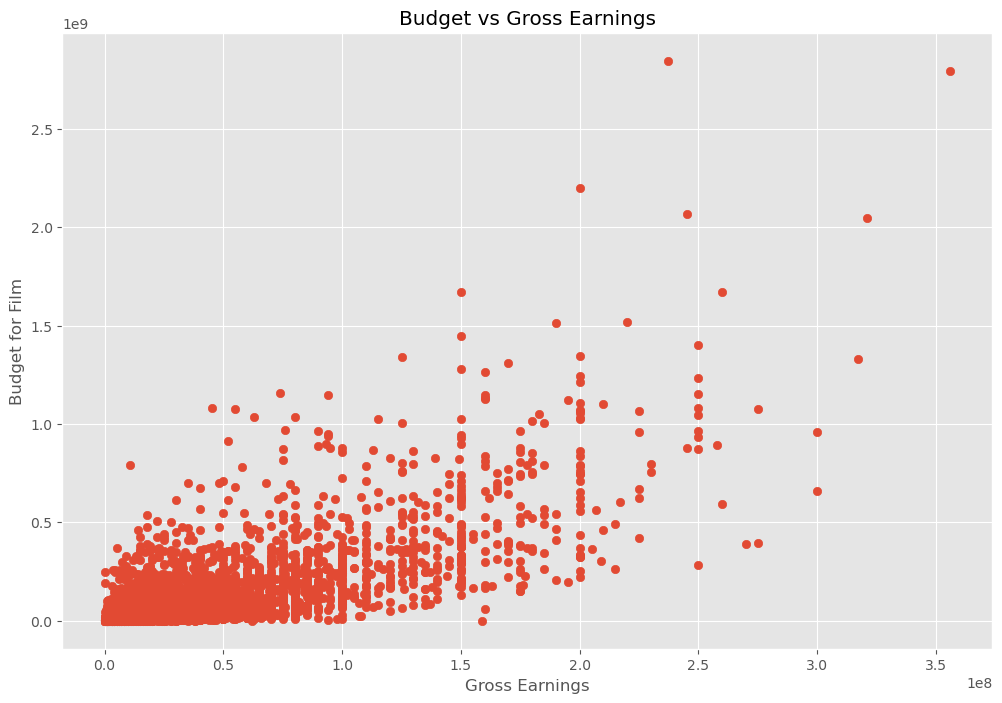

In [14]:
# scatter plot with budget vs gross


plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [15]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

budget                company        country       director   genre  \
5445  237000000  Twentieth Century Fox  United States  James Cameron  Action   
7445  356000000         Marvel Studios  United States  Anthony Russo  Action   
3045  200000000  Twentieth Century Fox  United States  James Cameron   Drama   
6663  245000000              Lucasfilm  United States    J.J. Abrams  Action   
7244  321000000         Marvel Studios  United States  Anthony Russo  Action   

           gross                                        name rating  \
5445  2847246203                                      Avatar  PG-13   
7445  2797501328                           Avengers: Endgame  PG-13   
3045  2201647264                                     Titanic  PG-13   
6663  2069521700  Star Wars: Episode VII - The Force Awakens  PG-13   
7244  2048359754                      Avengers: Infinity War  PG-13   

                               released  runtime  score               star  \
5445  December 18, 2009 (United States)    162.0    7.8    Sam Worthington   
7445     April 26, 2019 (United States)    181.0    8.4  Robert Downey Jr.   
3045  December 19, 1997 (United States)    194.0    7.8  Leonardo DiCaprio   
6663  December 18, 2015 (United States)    138.0    7.8       Daisy Ridley   
7244     April 27, 2018 (United States)    149.0    8.4  Robert Downey Jr.   

          votes              writer  year yearcorrect  
5445  1100000.0       James Cameron  2009        2009  
7445   903000.0  Christopher Markus  2019        2019  
3045  1100000.0       James Cameron  1997        1997  
6663   876000.0     Lawrence Kasdan  2015        2015  
7244   897000.0  Christopher Markus  2018        2018

<Axes: xlabel='budget', ylabel='gross'>

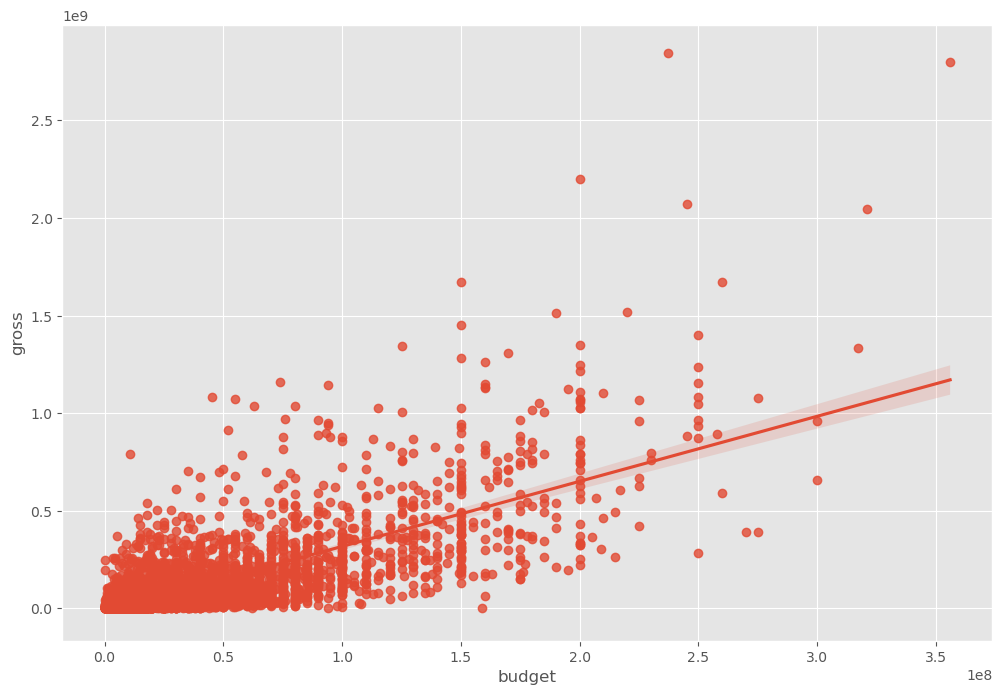

In [16]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df)

<Axes: xlabel='budget', ylabel='gross'>

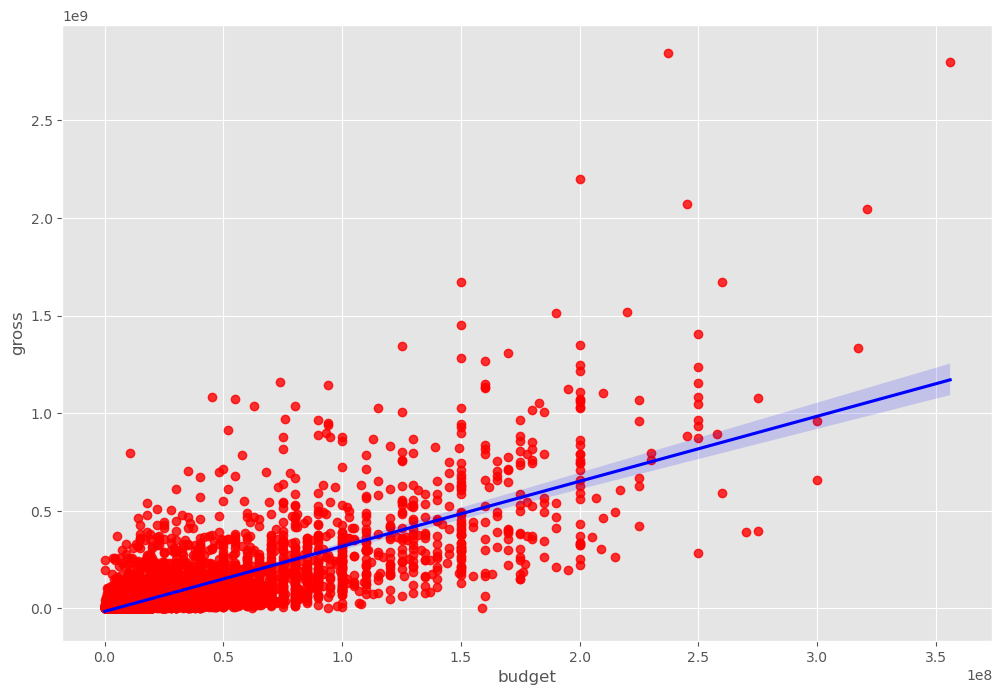

In [17]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color":'blue'})

In [18]:
# Let's start looking at correlation

df.corr(numeric_only = True)

budget     gross   runtime     score     votes      year
budget   1.000000  0.740247  0.318695  0.072001  0.439675  0.327722
gross    0.740247  1.000000  0.275796  0.222556  0.614751  0.274321
runtime  0.318695  0.275796  1.000000  0.414068  0.352303  0.075077
score    0.072001  0.222556  0.414068  1.000000  0.474256  0.056386
votes    0.439675  0.614751  0.352303  0.474256  1.000000  0.206021
year     0.327722  0.274321  0.075077  0.056386  0.206021  1.000000

In [19]:
#different correlations: pearson, kendall, spearman

In [20]:
df.corr(method = 'pearson', numeric_only = True) #default method

budget     gross   runtime     score     votes      year
budget   1.000000  0.740247  0.318695  0.072001  0.439675  0.327722
gross    0.740247  1.000000  0.275796  0.222556  0.614751  0.274321
runtime  0.318695  0.275796  1.000000  0.414068  0.352303  0.075077
score    0.072001  0.222556  0.414068  1.000000  0.474256  0.056386
votes    0.439675  0.614751  0.352303  0.474256  1.000000  0.206021
year     0.327722  0.274321  0.075077  0.056386  0.206021  1.000000

In [21]:
df.corr(method = 'kendall', numeric_only = True)

budget     gross   runtime     score     votes      year
budget   1.000000  0.512057  0.231278 -0.006406  0.346274  0.220833
gross    0.512057  1.000000  0.176979  0.124943  0.553625  0.239539
runtime  0.231278  0.176979  1.000000  0.292254  0.205344  0.064824
score   -0.006406  0.124943  0.292254  1.000000  0.350185  0.039389
votes    0.346274  0.553625  0.205344  0.350185  1.000000  0.296512
year     0.220833  0.239539  0.064824  0.039389  0.296512  1.000000

In [22]:
df.corr(method = 'spearman', numeric_only = True)

budget     gross   runtime     score     votes      year
budget   1.000000  0.692958  0.330794 -0.009971  0.493461  0.312886
gross    0.692958  1.000000  0.257400  0.183192  0.745793  0.351045
runtime  0.330794  0.257400  1.000000  0.412155  0.300621  0.095444
score   -0.009971  0.183192  0.412155  1.000000  0.495409  0.057741
votes    0.493461  0.745793  0.300621  0.495409  1.000000  0.427623
year     0.312886  0.351045  0.095444  0.057741  0.427623  1.000000

In [23]:
# High correlation between budget and gross

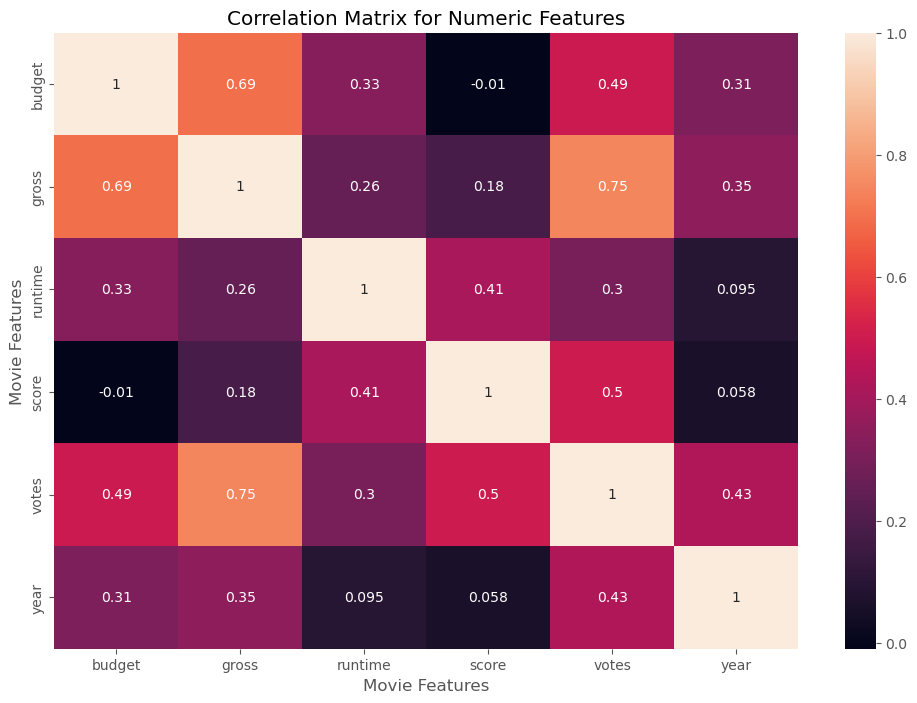

In [24]:
correlation_matrix = df.corr(method = 'spearman', numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()


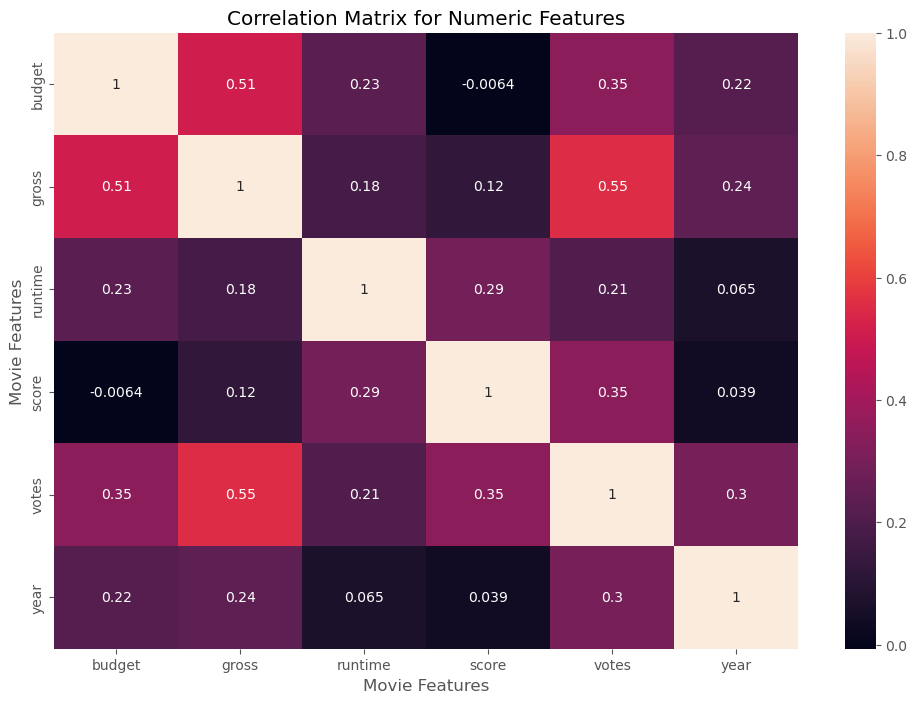

In [25]:
correlation_matrix = df.corr(method = 'kendall', numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()


In [26]:
# Look at company

df.head()

budget                company        country       director   genre  \
5445  237000000  Twentieth Century Fox  United States  James Cameron  Action   
7445  356000000         Marvel Studios  United States  Anthony Russo  Action   
3045  200000000  Twentieth Century Fox  United States  James Cameron   Drama   
6663  245000000              Lucasfilm  United States    J.J. Abrams  Action   
7244  321000000         Marvel Studios  United States  Anthony Russo  Action   

           gross                                        name rating  \
5445  2847246203                                      Avatar  PG-13   
7445  2797501328                           Avengers: Endgame  PG-13   
3045  2201647264                                     Titanic  PG-13   
6663  2069521700  Star Wars: Episode VII - The Force Awakens  PG-13   
7244  2048359754                      Avengers: Infinity War  PG-13   

                               released  runtime  score               star  \
5445  December 18, 2009 (United States)    162.0    7.8    Sam Worthington   
7445     April 26, 2019 (United States)    181.0    8.4  Robert Downey Jr.   
3045  December 19, 1997 (United States)    194.0    7.8  Leonardo DiCaprio   
6663  December 18, 2015 (United States)    138.0    7.8       Daisy Ridley   
7244     April 27, 2018 (United States)    149.0    8.4  Robert Downey Jr.   

          votes              writer  year yearcorrect  
5445  1100000.0       James Cameron  2009        2009  
7445   903000.0  Christopher Markus  2019        2019  
3045  1100000.0       James Cameron  1997        1997  
6663   876000.0     Lawrence Kasdan  2015        2015  
7244   897000.0  Christopher Markus  2018        2018

In [27]:
df_numerize = df
for col_name in df_numerize.columns:
    if (df_numerize[col_name].dtype == 'object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes
df_numerize.head()

budget  company  country  director  genre       gross  name  rating  \
5445  237000000     1382       47       785      0  2847246203   386       5   
7445  356000000      983       47       105      0  2797501328   388       5   
3045  200000000     1382       47       785      6  2201647264  4909       5   
6663  245000000      945       47       768      0  2069521700  3643       5   
7244  321000000      983       47       105      0  2048359754   389       5   

      released  runtime  score  star      votes  writer  year  yearcorrect  
5445       527    162.0    7.8  1534  1100000.0    1263  2009           31  
7445       137    181.0    8.4  1470   903000.0     513  2019           41  
3045       534    194.0    7.8  1073  1100000.0    1263  1997           19  
6663       529    138.0    7.8   356   876000.0    1806  2015           37  
7244       145    149.0    8.4  1470   897000.0     513  2018           40

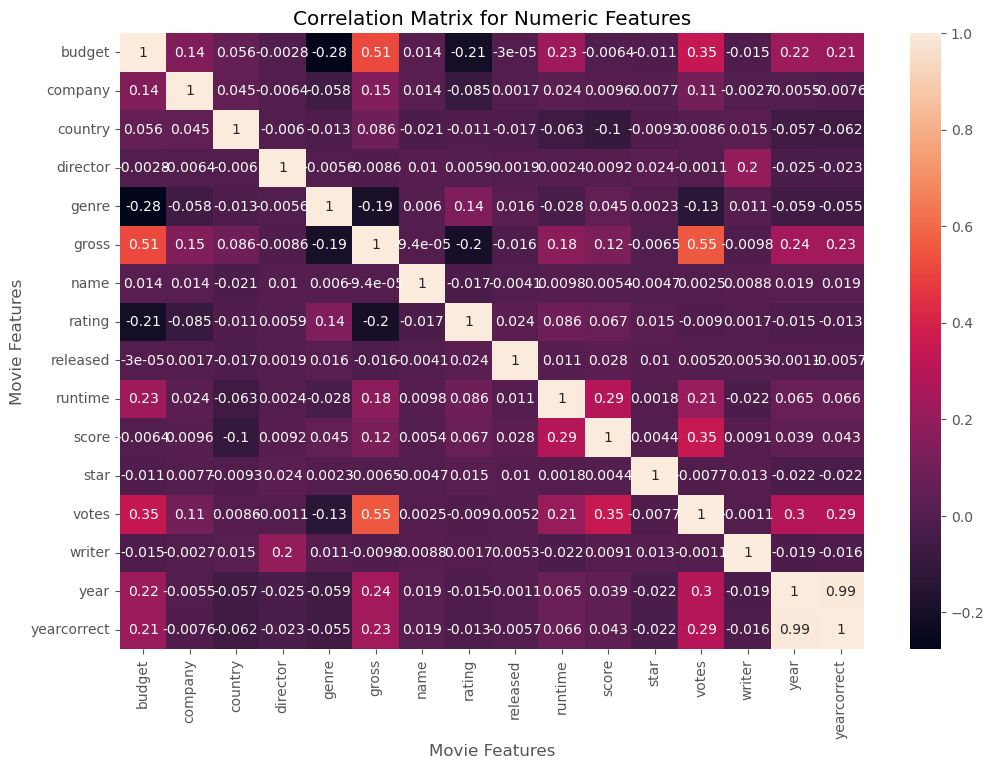

In [28]:
correlation_matrix = df_numerize.corr(method = 'kendall', numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()


In [29]:
df_numerize.corr()

budget   company   country  director     genre     gross  \
budget       1.000000  0.170235  0.052977 -0.009662 -0.368523  0.740247   
company      0.170235  1.000000  0.048569 -0.008223 -0.071334  0.149553   
country      0.052977  0.048569  1.000000  0.011133 -0.009164  0.060078   
director    -0.009662 -0.008223  0.011133  1.000000 -0.008553 -0.029560   
genre       -0.368523 -0.071334 -0.009164 -0.008553  1.000000 -0.244101   
gross        0.740247  0.149553  0.060078 -0.029560 -0.244101  1.000000   
name         0.023392  0.021697 -0.025490  0.015246  0.010996  0.005639   
rating      -0.203946 -0.092357  0.008230  0.014656  0.147796 -0.181906   
released     0.019952 -0.002407 -0.017228  0.002308  0.022142  0.008501   
runtime      0.318695  0.037585 -0.034477  0.017433 -0.059237  0.275796   
score        0.072001  0.020656 -0.043051  0.005413  0.035106  0.222556   
star        -0.021473  0.014082 -0.009990  0.036593  0.003341 -0.000004   
votes        0.439675  0.118470  0.041551 -0.010376 -0.135990  0.614751   
writer      -0.039466 -0.003697  0.022488  0.261735  0.017578 -0.035885   
year         0.327722 -0.014333 -0.066748 -0.038354 -0.073167  0.274321   
yearcorrect  0.320216 -0.016150 -0.071611 -0.035162 -0.067962  0.268367   

                 name    rating  released   runtime     score      star  \
budget       0.023392 -0.203946  0.019952  0.318695  0.072001 -0.021473   
company      0.021697 -0.092357 -0.002407  0.037585  0.020656  0.014082   
country     -0.025490  0.008230 -0.017228 -0.034477 -0.043051 -0.009990   
director     0.015246  0.014656  0.002308  0.017433  0.005413  0.036593   
genre        0.010996  0.147796  0.022142 -0.059237  0.035106  0.003341   
gross        0.005639 -0.181906  0.008501  0.275796  0.222556 -0.000004   
name         1.000000 -0.029234 -0.006152  0.010850  0.014450 -0.006882   
rating      -0.029234  1.000000  0.018083  0.140792  0.065983  0.009196   
released    -0.006152  0.018083  1.000000  0.008975  0.045874  0.015706   
runtime      0.010850  0.140792  0.008975  1.000000  0.414068  0.010108   
score        0.014450  0.065983  0.045874  0.414068  1.000000  0.007296   
star        -0.006882  0.009196  0.015706  0.010108  0.007296  1.000000   
votes        0.012615  0.006031  0.028833  0.352303  0.474256 -0.017638   
writer       0.012880 -0.003149  0.008072 -0.017561  0.012843  0.018520   
year         0.025542  0.019499 -0.001740  0.075077  0.056386 -0.032157   
yearcorrect  0.026784  0.019749 -0.008821  0.076203  0.061059 -0.031631   

                votes    writer      year  yearcorrect  
budget       0.439675 -0.039466  0.327722     0.320216  
company      0.118470 -0.003697 -0.014333    -0.016150  
country      0.041551  0.022488 -0.066748    -0.071611  
director    -0.010376  0.261735 -0.038354    -0.035162  
genre       -0.135990  0.017578 -0.073167    -0.067962  
gross        0.614751 -0.035885  0.274321     0.268367  
name         0.012615  0.012880  0.025542     0.026784  
rating       0.006031 -0.003149  0.019499     0.019749  
released     0.028833  0.008072 -0.001740    -0.008821  
runtime      0.352303 -0.017561  0.075077     0.076203  
score        0.474256  0.012843  0.056386     0.061059  
star        -0.017638  0.018520 -0.032157    -0.031631  
votes        1.000000 -0.005316  0.206021     0.202953  
writer      -0.005316  1.000000 -0.025908    -0.022050  
year         0.206021 -0.025908  1.000000     0.994821  
yearcorrect  0.202953 -0.022050  0.994821     1.000000

In [30]:
correlation_mat = df_numerize.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             company        0.170235
             country        0.052977
             director      -0.009662
             genre         -0.368523
             gross          0.740247
             name           0.023392
             rating        -0.203946
             released       0.019952
             runtime        0.318695
             score          0.072001
             star          -0.021473
             votes          0.439675
             writer        -0.039466
             year           0.327722
             yearcorrect    0.320216
company      budget         0.170235
             company        1.000000
             country        0.048569
             director      -0.008223
             genre         -0.071334
             gross          0.149553
             name           0.021697
             rating        -0.092357
             released      -0.002407
             runtime        0.037585
             score          0.020656
 

In [31]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
rating       company       -0.092357
company      rating        -0.092357
year         genre         -0.073167
genre        year          -0.073167
country      yearcorrect   -0.071611
yearcorrect  country       -0.071611
genre        company       -0.071334
company      genre         -0.071334
yearcorrect  genre         -0.067962
genre        yearcorrect   -0.067962
country      year          -0.066748
year         country       -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [32]:
high_corr = sorted_pairs[(sorted_pairs) > 0.43]
high_corr

budget       votes          0.439675
votes        budget         0.439675
score        votes          0.474256
votes        score          0.474256
             gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.994821
year         yearcorrect    0.994821
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [33]:
#votes and budget have the highest correlation to gross earnings
#Company has low correlation